<p style = "font-weight: bold; font-size:2vw; line-height: 1.4; background-color:#c4a9b8;"> There are several optons for creating a 2d array with the pixels that make up an image: <br> <br> 1. Using the pillow library and Python lists </p>

In [1]:
from PIL import Image

# Create the image object:
pic = Image.open("a.jpg")

print("type(pic)          ", type(pic))
print("pic                ", pic)
print("pic.format         ", pic.format)
print("pic.mode           ", pic.mode)
print("pic.size           ", pic.size)
print("pic.getdata        ", pic.getdata)
print("pic.getdata()      ", pic.getdata())
print("pic.getdata()[20]  ", pic.getdata()[20])
print(" ")

type(pic)           <class 'PIL.JpegImagePlugin.JpegImageFile'>
pic                 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=852x480 at 0x7F537808CF60>
pic.format          JPEG
pic.mode            RGB
pic.size            (852, 480)
pic.getdata         <bound method Image.getdata of <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=852x480 at 0x7F537808CF60>>
pic.getdata()       <ImagingCore object at 0x7f537013c330>
pic.getdata()[20]   (72, 38, 39)
 


In [2]:
# Read the pixels from the image object into a python list:
pic_pixel_mat = []
pic_pixel_line = []
for pixel in iter(pic.getdata()):
    pic_pixel_line.append(pixel)
    if len(pic_pixel_line)%852 == 0:
        pic_pixel_mat.append(pic_pixel_line)
        pic_pixel_line = []

print(len(pic_pixel_mat), len(pic_pixel_mat[1]))
print(pic_pixel_mat[234][220])
print(" ")

480 852
(78, 42, 44)
 


<p style = "font-weight: bold; font-size:2vw; line-height: 1.6; background-color:#c4a9b8;"> 2. Using the pillow library and numpy arrays </p>

In [3]:
from PIL import Image
import numpy

# Load the image
pic = Image.open("a.jpg")

# convert image to numpy array
narr = numpy.zeros((pic.size[1], pic.size[0], 3), dtype=numpy.uint8)
i = 0
j = 0
for pixel in iter(pic.getdata()):
    narr[i][j] = pixel
    j = j + 1
    if (j == 852):
        j = 0
        i = i + 1

print("type(narr)          ", type(narr))
print("narr.dtype          ", narr.dtype)
print("narr.shape          ", narr.shape)
print("narr[234][220]      ", narr[234][220])
print("narr[234,220]       ", narr[234,220])
print(" ")

type(narr)           <class 'numpy.ndarray'>
narr.dtype           uint8
narr.shape           (480, 852, 3)
narr[234][220]       [78 42 44]
narr[234,220]        [78 42 44]
 


<p style = "font-weight: bold; font-size:2vw; line-height: 1.6; background-color:#c4a9b8;"> 3. Using the pillow library and numpy arrays (built in) </p>

In [4]:
from PIL import Image
from numpy import asarray

# load the image
image = Image.open("a.jpg")

# convert image to numpy array
narrr = asarray(image)

print("type(narrr)          ", type(narrr))
print("narrr.dtype          ", narrr.dtype)
print("narrr.shape          ", narrr.shape)
print("narrr[234][220]      ", narrr[234][220])
print("narrr[234,220]       ", narrr[234,220])
print(" ")

type(narrr)           <class 'numpy.ndarray'>
narrr.dtype           uint8
narrr.shape           (480, 852, 3)
narrr[234][220]       [78 42 44]
narrr[234,220]        [78 42 44]
 


<p style = "font-weight: bold; font-size:1.5vw; line-height: 1.8; background-color:#c4a9b8;"> A numpy array can also be converted back to a pillow image and saved as a PNG, JPG, etc. file: </p>

In [5]:
image2 = Image.fromarray(narr)

print("type(image2)          ", type(image2))
print("image2                ", image2)
print("image2.format         ", image2.format)
print("image2.mode           ", image2.mode)
print("image2.size           ", image2.size)
print("image2.getdata        ", image2.getdata)
print("image2.getdata()      ", image2.getdata())
print("image2.getdata()[20]  ", image2.getdata()[20])
print(" ")

image2 = Image.fromarray(narr).save('a.png')

type(image2)           <class 'PIL.Image.Image'>
image2                 <PIL.Image.Image image mode=RGB size=852x480 at 0x7F5378078DD8>
image2.format          None
image2.mode            RGB
image2.size            (852, 480)
image2.getdata         <bound method Image.getdata of <PIL.Image.Image image mode=RGB size=852x480 at 0x7F5378078DD8>>
image2.getdata()       <ImagingCore object at 0x7f537807e550>
image2.getdata()[20]   (72, 38, 39)
 


<p style = "font-weight: bold; font-size:2vw; line-height: 1.6; background-color:#c4a9b8;"> 4. Using matplotlib </p> 

type(im)           <class 'numpy.ndarray'>
im.dtype           uint8
im.shape           (480, 852, 3)
im[234][220]       [78 42 44]
im[234,220]        [78 42 44]


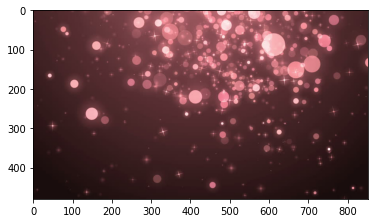

In [6]:
from matplotlib import image
from matplotlib import pyplot

# load image as pixel array
im = image.imread('a.jpg')

# summarize pixel array
print("type(im)          ", type(im))
print("im.dtype          ", im.dtype)
print("im.shape          ", im.shape)
print("im[234][220]      ", im[234][220])
print("im[234,220]       ", im[234,220])

# display the array of pixels as an image
pyplot.imshow(im)
pyplot.show()

<p style = "font-weight: bold; font-size:2vw; line-height: 1.6; background-color:#c4a9b8;"> 5. Using OpenCV </p> 

In [1]:
import cv2

im = cv2.imread('a.jpg')
img = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)   # BGR -> RGB
cv2.imwrite('a_opnecv.png', img) 

print("type(img)          ", type(img))
print("img.dtype          ", img.dtype)
print("img.shape          ", img.shape)
print("img[234][220]      ", img[234][220])
print("img[234,220]       ", img[234,220])

type(img)           <class 'numpy.ndarray'>
img.dtype           uint8
img.shape           (480, 852, 3)
img[234][220]       [78 42 44]
img[234,220]        [78 42 44]
